# 🚀 DATA SCIENCE CHALLENGE SCL WEEK 2  🚀
## Predicting particles velocity 

<img src='https://robertocavada.com/wp-content/uploads/2021/06/nasa-fotografia-mexico-espacio.jpg'>

## ✨ BACKGROUND ✨
NASA has designed a new type of sensor that, from measuring the electromagnetic variation in a field, it can estimate the velocity of one particle relative to the velocity of the other particle. In this challenge, the data obtained from this sensor will be used to train a predictive model to predict that relative velocity.

---------
La NASA ha diseñado un nuevo tipo de sensor que, a partir de medir la variación electromagnética en un campo, puede estimar la velocidad de una partícula en relación con la velocidad de la otra partícula. En este desafío, los datos obtenidos de este sensor se utilizarán para entrenar un modelo predictivo para predecir esa velocidad relativa.

## ✨ DATASET ✨
For this challenge two datasets are provided, the dataset for training the predictive algorithm and the dataset for testing the predictive algorithm.

**train.csv**
(6 columns x 7000 rows) the first 5 columns contains the predictive variables and the 6 column contains the target to predict.

**X_test.csv**
(5 columns x 3000 rows) contains the predictive variables to test your algorithm.

-----------
Para este desafío se proporcionan dos conjuntos de datos, el conjunto de datos para entrenar el algoritmo predictivo y el conjunto de datos para probar el algoritmo predictivo.

**train.csv**
(6 columnas x 7000 filas) las primeras 5 columnas contienen las variables predictivas y la 6 columna contiene el objetivo a predecir.

**X_test.csv**
(5 columnas x 3000 filas) contiene las variables predictivas para probar el algoritmo.


## ✨🏆 TASK 🏆✨
Create a predictive MACHINE LEARNING (not ANN) algorithm to predict the relative velocity of the particles. The aim is to find the algorithm that minimizes the mean squared error (MSE).

-------------
Crear un algoritmo predictivo de Machine Learning (no ANN) para predecir la velocidad relativa de las partículas. El objetivo es encontrar el algoritmo que minimice el error cuadrático medio (MSE).

# Librerías a Utilizar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

# Dataset y Análisis preliminar

In [2]:
#importamos el set de entrenamiento
df = pd.read_csv('train.csv')

In [3]:
#Visualizamos las primeras filas
df.head(2)

,Param_1,Param_2,Param_3,Param_4,Param_5,Target
0,0.465242,-2.357623,-0.131047,0.523789,1.008173,107.768143
1,-0.797683,0.442970,0.379240,-0.519158,-0.779786,-91.208318


In [4]:
#Verificamos la existencia (o no) de valores nulos
df.isnull().sum()

Param_1    0
Param_2    0
Param_3    0
Param_4    0
Param_5    0
Target     0
dtype: int64

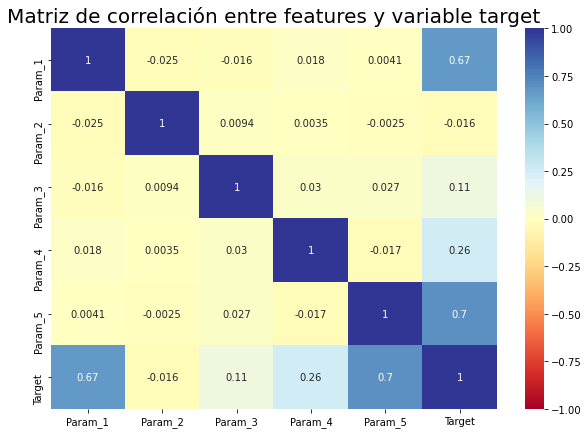

In [5]:
#Para verificar la relación de las variables entre si, podemos hacer un gráfico de la matriz de correlación.
plt.figure(figsize=(10,7))
plt.title('Matriz de correlación entre features y variable target', size=20)
sns.heatmap(df.corr(), annot=True, vmin = -1, vmax=1, cmap='RdYlBu');

De la matriz de correlación, podemos observar que:
* Las variables independientes tienen poca correlación entre si mismas
* Nuestro target tiene una fuerte correlación positiva con el parametro 5 y el parametro 1, y en menor medida con el parámetro 4.
* La última observación la podremos apreciar mejor en el siguiente gráfico.

Text(0.5, 1.0, 'Relacón entre Target y Parametro 2')

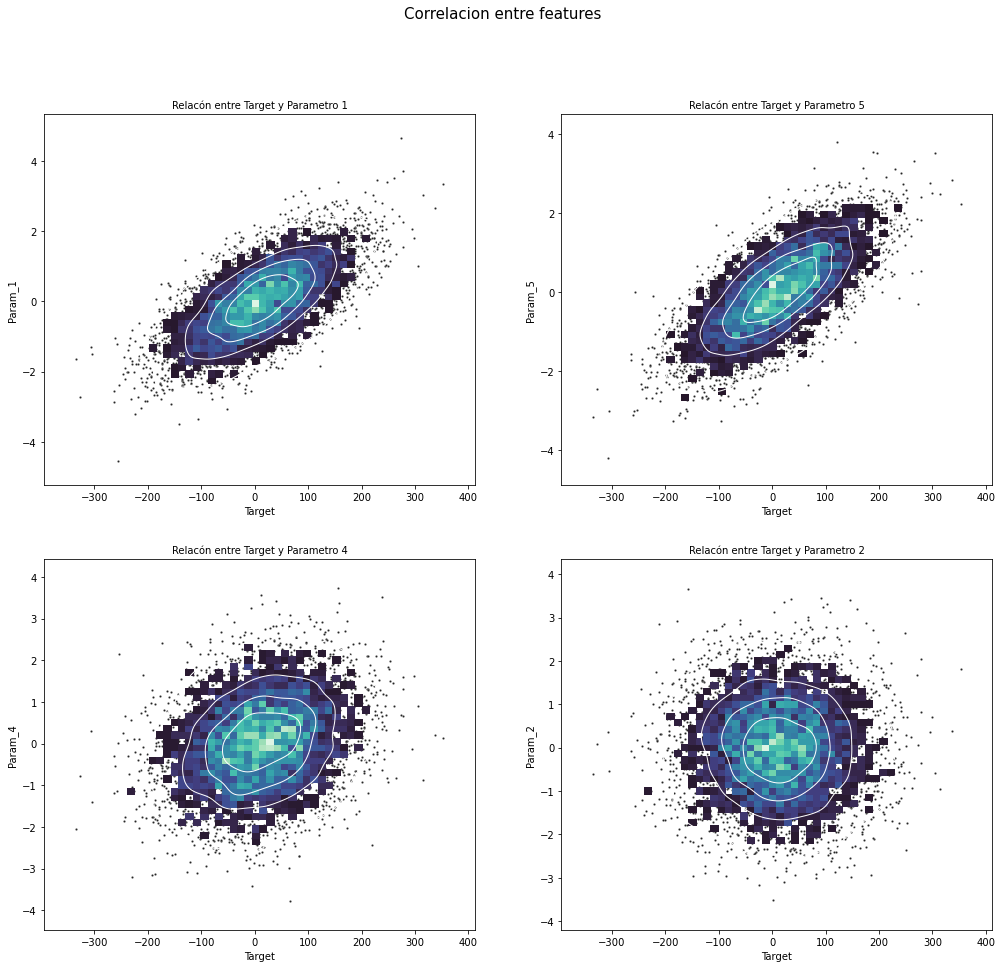

In [6]:
fig, axis=plt.subplots(2,2,figsize=(17,15))
plt.suptitle('Correlacion entre features',size=15)

sns.scatterplot(x=df['Target'], y=df['Param_1'], s=5, color=".15", ax=axis[0,0])
axis[0,0].set_title('Relacón entre Target y Parametro 1', size=10)
sns.histplot(x=df['Target'], y=df['Param_1'], bins=50, pthresh=.1, cmap="mako",ax=axis[0,0])
sns.kdeplot(x=df['Target'], y=df['Param_1'], levels=5, color="w", linewidths=1,ax=axis[0,0])

sns.scatterplot(x=df['Target'], y=df['Param_5'], s=5, color=".15", ax=axis[0,1])
sns.histplot(x=df['Target'], y=df['Param_5'], bins=50, pthresh=.1, cmap="mako",ax=axis[0,1])
sns.kdeplot(x=df['Target'], y=df['Param_5'], levels=5, color="w", linewidths=1,ax=axis[0,1])
axis[0,1].set_title('Relacón entre Target y Parametro 5', size=10)


sns.scatterplot(x=df['Target'], y=df['Param_4'], s=5, color=".15", ax=axis[1,0])
sns.histplot(x=df['Target'], y=df['Param_4'], bins=50, pthresh=.1, cmap="mako",ax=axis[1,0])
sns.kdeplot(x=df['Target'], y=df['Param_4'], levels=5, color="w", linewidths=1,ax=axis[1,0])
axis[1,0].set_title('Relacón entre Target y Parametro 4', size=10)

sns.scatterplot(x=df['Target'], y=df['Param_2'], s=5, color=".15", ax=axis[1,1])
sns.histplot(x=df['Target'], y=df['Param_2'], bins=50, pthresh=.1, cmap="mako",ax=axis[1,1])
sns.kdeplot(x=df['Target'], y=df['Param_2'], levels=5, color="w", linewidths=1,ax=axis[1,1])
axis[1,1].set_title('Relacón entre Target y Parametro 2', size=10)

## Separamos nuestro set de variables target y predictoras

In [7]:
X = df.loc[:,df.columns!="Target"]

In [8]:
y = df["Target"]

## Separamos nuestros dataset en Train y Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [10]:
# Definimos una funcion que nos calcule el RMSE para comparar los modelos
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

## 1) Modelo Lineal de Regresión

In [11]:
# Ajustamos el modelo 
lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

print('Score model_1:', model_1.score(X_test, y_test))
print('RMSE model_1:', RMSE(lm.predict(X_test), y_test))

Score model_1: 0.9999987297218921
RMSE model_1: 0.098467993834716


## 2) Modelo Lineal con Ridge Cross Validation

Este tipo de modelo, al igual que Lasso, se basa en los principios de la regularización, modificando la función de costo que utiliza normalmente un modelo lineal, para agrear un término que penaliza los modelos por su complejidad.
Un mayor valor de $\alpha$ significa una mayor penalización, ya que aumenta el costo, que es lo que buscamos minimizar.

Uno de los objetivos que buscamos al aplicar técnicas de regularización, es prevenir lo que se conoce como Overfitting o sobre ajuste, que se produce cuando nuestro modelo considera tanta información de nuestras features disponibles, que se "adapta" demasiado a los datos conocidos, perdiendo capacidad para predecir en condiciones nuevas.

In [12]:
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10], normalize=True, cv=3) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)

print('Score model_2:', model_2.score(X_test, y_test))
print('RMSE model_2:', RMSE(lm_ridge.predict(X_test), y_test))

Score model_2: 0.9999987295898208
RMSE model_2: 0.0984731125780228


## 3) Modelo Lineal con Lasso Cross Validation

La regresión de lazo es un tipo popular de regresión lineal regularizada que incluye una penalización L1. Esto tiene el efecto de reducir los coeficientes para aquellas variables de entrada que no contribuyen mucho a la tarea de predicción. 

Esta penalización permite que algunos valores de coeficientes lleguen al valor de cero, lo que permite que las variables de entrada se eliminen de manera efectiva del modelo, proporcionando un tipo de selección automática de características.

In [13]:
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25],\
                                        normalize=True, cv=3)

model_3 = lm_lasso.fit(X_train, y_train)

print('Score model_3:', model_3.score(X_test, y_test))
print('RMSE model_3:', RMSE(lm_lasso.predict(X_test), y_test))

Score model_3: 0.9999987298559674
RMSE model_3: 0.0984627971470111


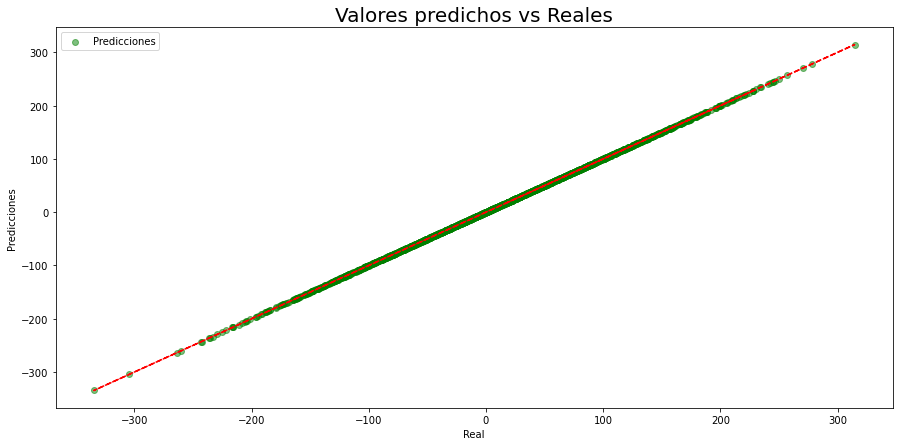

In [15]:
plt.figure(figsize=(15,7))
plt.title('Valores predichos vs Reales', size=20)
plt.scatter(y_test, lm_lasso.predict(X_test), c="green", alpha=0.5,marker="o",
            label="Predicciones")
plt.plot(y_test, y_test, color='r', linestyle='--')
plt.xlabel("Real")
plt.ylabel("Predicciones")
plt.legend(loc='upper left')
plt.show()

## Selección del Modelo, y predicción final

Luego de las pruebas realizadas, utilizaremos nuestro modelo 3, que utiliza una regresión con Lasso CV.

Para realizar las predicciones finales, vamos a importar nuestro dataset de TEST (el cual es completamente nuevo para nuestro algoritmo), y realizaremos sobre él una única pasada para predecir los valores del target, con nuestro modelo ya entrenado.

In [16]:
X_unknown = pd.read_csv('X_test.csv')

In [17]:
y_predict_final = lm_lasso.predict(X_unknown)

In [19]:
predictions = pd.DataFrame(y_predict_final)

In [22]:
predictions.columns = ['Y_Pred']

In [24]:
predictions.to_csv('predictions_delivery.csv')

<img src='https://t3.ftcdn.net/jpg/02/92/36/76/360_F_292367633_TwzHFo2XLSSbcihgxESm2sKcQ0NlwrIG.jpg'>